In [1]:
from TPED.projects.GENE_sim_reader.src.GENE_field_data import GeneField as GF
from TPED.projects.GENE_sim_reader.utils.find_GENE_files import GeneFileFinder as GFF

import os

In [2]:
scan_path = '/pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q4_MTM_mode/convergence_check/nz0_hpyz_edgeopt_scans/nz0_1024_edgeopt_04/scanfiles0001'
gene_filepath = GFF(scan_path).find_files('field')[0]

print(gene_filepath)

/pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q4_MTM_mode/convergence_check/nz0_hpyz_edgeopt_scans/nz0_1024_edgeopt_04/scanfiles0001/field_0001


In [3]:
field = GF(gene_filepath)

field_dict = field.field_filepath_to_dict(time_criteria='all')

In [4]:
field_dict

{'filepath': '/pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q4_MTM_mode/convergence_check/nz0_hpyz_edgeopt_scans/nz0_1024_edgeopt_04/scanfiles0001/field_0001',
 'time': [0.0,
  0.007810000000000016,
  0.015619999999999952,
  0.02343000000000006,
  0.031240000000000167,
  0.03904999999999993,
  0.046859999999999694,
  0.054669999999999455,
  0.06247999999999922,
  0.07028999999999898,
  0.07809999999999874,
  0.0859099999999985,
  0.09371999999999826,
  0.10152999999999802,
  0.10933999999999779,
  0.11714999999999755,
  0.12495999999999731,
  0.13276999999999708,
  0.14057999999999685,
  0.1483899999999966,
  0.15619999999999637,
  0.16400999999999613,
  0.1718199999999959,
  0.17962999999999565,
  0.18743999999999542,
  0.19524999999999518,
  0.20305999999999494,
  0.2108699999999947,
  0.21867999999999446,
  0.22648999999999422,
  0.23429999999999399,
  0.24210999999999375,
  0.2499199999999935,
  0.257729999999996,
  0.26553999999999855,
  0.2733500000000011,
  0.2811600000

In [5]:
field_xarray = field.field_dict_to_xarray(field_dict)
field_xarray

<xarray.Dataset> Size: 522MB
Dimensions:     (time: 2274, zgrid: 7168)
Coordinates:
  * time        (time) float64 18kB 0.0 0.00781 0.01562 ... 17.74 17.74 17.75
  * zgrid       (zgrid) float64 57kB -7.0 -6.998 -6.996 ... 6.994 6.996 6.998
Data variables:
    field_phi   (time, zgrid) complex128 261MB (0.002416679116291-0.005351651...
    field_apar  (time, zgrid) complex128 261MB (5.832752075811839e-21-1.05571...
Attributes:
    filepath:   /pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q4_MTM...
    directory:  /pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q4_MTM...
    suffix:     0001

In [6]:
field_xarray = field.field_filepath_to_xarray(time_criteria='all')
field_xarray

<xarray.Dataset> Size: 522MB
Dimensions:     (time: 2274, zgrid: 7168)
Coordinates:
  * time        (time) float64 18kB 0.0 0.00781 0.01562 ... 17.74 17.74 17.75
  * zgrid       (zgrid) float64 57kB -7.0 -6.998 -6.996 ... 6.994 6.996 6.998
Data variables:
    field_phi   (time, zgrid) complex128 261MB (0.002416679116291-0.005351651...
    field_apar  (time, zgrid) complex128 261MB (5.832752075811839e-21-1.05571...
Attributes:
    filepath:   /pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q4_MTM...
    directory:  /pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q4_MTM...
    suffix:     0001

In [7]:
field_xarray = field.field_filepath_to_xarray(time_criteria='last')
field_xarray

<xarray.Dataset> Size: 287kB
Dimensions:     (time: 1, zgrid: 7168)
Coordinates:
  * time        (time) float64 8B 17.75
  * zgrid       (zgrid) float64 57kB -7.0 -6.998 -6.996 ... 6.994 6.996 6.998
Data variables:
    field_phi   (time, zgrid) complex128 115kB (0.06787432426938353+0.1028259...
    field_apar  (time, zgrid) complex128 115kB (-0.034349165227892484+0.08902...
Attributes:
    filepath:   /pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q4_MTM...
    directory:  /pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q4_MTM...
    suffix:     0001

In [8]:
field = GF(gene_filepath)

field_xarray_1 = field.field_filepath_to_xarray(time_criteria='all', time_sampler_method='absolute')
field_xarray_2 = field.field_filepath_to_xarray(time_criteria='last', time_sampler_method='absolute')

check_fields = True

for field in ['field_phi', 'field_apar']:

    final_field_1 = field_xarray_1[field][-1].values
    final_field_2 = field_xarray_2[field][-1].values
    # print(final_field_1[0:5], '\n',final_field_2[0:5])
    print(final_field_1, '\n',final_field_2)
    check_fields *= (final_field_1 == final_field_2)

    print('Checking field {}:'.format(field), check_fields)
    

final_time_1 = field_xarray_1['time'][-1].values
final_time_2 = field_xarray_2['time'][-1].values
check_time = (final_time_1 == final_time_2)

print(final_time_1, final_time_2)
print(check_fields, check_time)

[0.06787432+0.10282594j 0.15039018+0.0316933j  0.06913247+0.10292762j ...
 0.        +0.j         0.        +0.j         0.        +0.j        ] 
 [0.06787432+0.10282594j 0.15039018+0.0316933j  0.06913247+0.10292762j ...
 0.        +0.j         0.        +0.j         0.        +0.j        ]
Checking field field_phi: [ True  True  True ...  True  True  True]
[-0.03434917+0.0890227j   0.03241769+0.01914396j -0.03372386+0.08791126j
 ... -0.        -0.j         -0.        -0.j
 -0.        -0.j        ] 
 [-0.03434917+0.0890227j   0.03241769+0.01914396j -0.03372386+0.08791126j
 ... -0.        -0.j         -0.        -0.j
 -0.        -0.j        ]
Checking field field_apar: [False False False ...  True  True  True]
17.745881999939066 17.745881999939066
[False False False ...  True  True  True] True


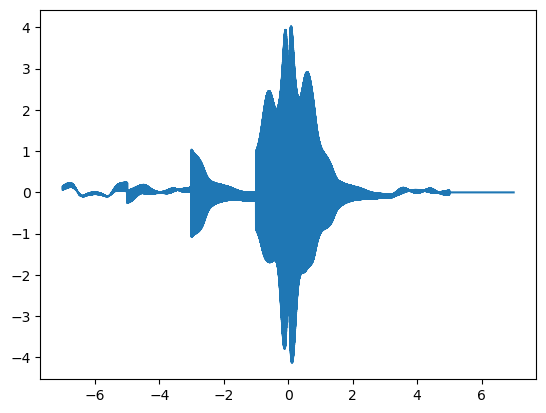

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(field_dict['zgrid'], np.real(field_dict['field_phi'][-1]))
plt.show()